In [1]:
import sqlite3

In [2]:
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [3]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

In [4]:
sales_data = [
    ('Apple', 10, 0.5),
    ('Banana', 15, 0.3),
    ('Orange', 8, 0.6),
    ('Apple', 5, 0.5),
    ('Banana', 10, 0.3),
    ('Orange', 7, 0.6)
]

In [5]:
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sales_data)
conn.commit()
conn.close()

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
conn = sqlite3.connect("sales_data.db")

In [9]:
query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
"""

In [10]:
df = pd.read_sql_query(query, conn)


In [11]:
print("📊 Sales Summary by Product:\n")
print(df)

📊 Sales Summary by Product:

  product  total_qty  revenue
0   Apple         30     15.0
1  Banana         50     15.0
2  Orange         30     18.0


In [16]:
overall_total = """
SELECT 
    SUM(quantity) AS grand_total_qty, 
    SUM(quantity * price) AS grand_revenue 
FROM sales
"""

In [17]:
df_total = pd.read_sql_query(overall_total, conn)

In [18]:
print("\n🧾 Overall Sales Totals:\n")
print(df_total)


🧾 Overall Sales Totals:

   grand_total_qty  grand_revenue
0              110           48.0


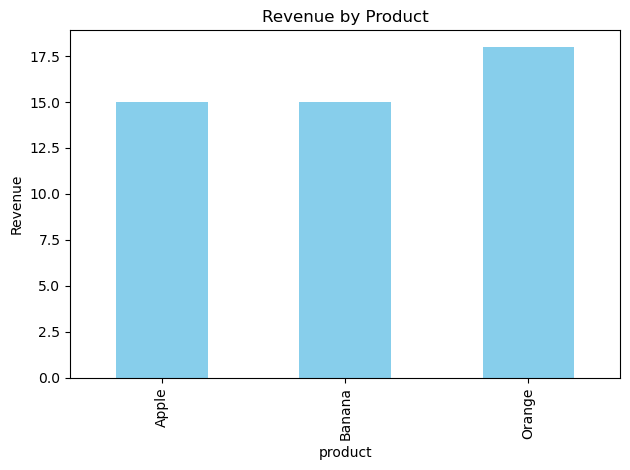

In [19]:
df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.title('Revenue by Product')
plt.ylabel('Revenue')
plt.tight_layout()
plt.savefig("sales_chart.png")  
plt.show()

In [20]:
conn.close()